## Multiclass Classification - Using Neural Network (Softmax Regression)

This notebook performs multiclass classification using neural networks. 



Objective:
- Train a neural network model capable to predict a multiclass problem.
- Two neural network models, with different architectures, will be trainned. 
- The models will be trainned in the training dataset, and their performance will be assessed using the testing dataset. 

Dataset:
- The Iris dataset is used in this problem. dataset available at: `https://www.kaggle.com/datasets/uciml/iris`


In [19]:
import numpy as np
import pandas as pd
import neural_network_softmax
import matplotlib.pyplot as plt

#### 01- Data Loading and Pre-Processing

In [2]:
# Get data:
df = pd.read_csv(filepath_or_buffer='dataset_classification\Iris.csv',sep=',')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Objective of the multiclass Neural Network model:
- Based on the values of `SepalLengthCm`, `SepalWidthCm`, `PetalLengthCm`, `PetalWidthCm` predict the species of the Iris plant. It can be `Iris-setosa`, `Iris-versicolor`, `Iris-virginica`.


Hot-encoding the labels:

In [5]:
# Hot-encoding:
for label in df.Species.unique():
    df[label] = df.apply(lambda x:1 if x['Species'] == label else 0, axis=1)

In [6]:
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0


Split data into training and testing datasets

In [7]:
# Trainning dataset:
df_train = df.sample(frac=.7, replace=False, random_state=0)

# Testing dataset:
df_test = df[~df.index.isin(df_train.index)]

In [8]:
# Array for training:
X_train = df_train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
Y_train = df_train[[ 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica']].values # hot-encoded labels

X_test = df_test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
Y_test = df_test[[ 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica']].values # hot-encoded labels

Feature Scaling

In [9]:
# Scale the data
# Z-score Normalization:

x_train_mean = np.mean(X_train, axis=0)
x_train_std = np.std(X_train, axis=0)

# Normalize the training data
X_train_norm = (X_train - x_train_mean)/x_train_std # training data normalized

# Normalize the testing data- using the scale scale of the training data
X_test_norm = (X_test - x_train_mean)/x_train_std # training data normalized

#### 02- Define Models Neural Network Architecture 

In [10]:
# Model 01:

# Defining the Neural Network

# Setting layers:
layer_01 = neural_network_softmax.NN_Layer(layer='layer_01', units= 2, activation_func='relu') # This hidden layer contains 2 perceptrons, and activation function is Relu
layer_02 = neural_network_softmax.NN_Layer(layer='layer_02', units= 2, activation_func='relu')
layer_03 = neural_network_softmax.NN_Layer(layer='layer_03', units= 2, activation_func='relu')
layer_04 = neural_network_softmax.NN_Layer(layer='layer_04', units= 3, activation_func='softmax') # Final layer uses softmax activation layer and cross-entropy loss 

# Connecting layers to the model
nn_class_model_01 = neural_network_softmax.NN([layer_01, layer_02, layer_03, layer_04])


In [11]:
# Model 02:

# Defining the Neural Network

# Setting layers:
l_01 = neural_network_softmax.NN_Layer(layer='layer_01', units= 25, activation_func='relu') # This hidden layer contains 25 perceptrons, and activation function is Relu
l_02 = neural_network_softmax.NN_Layer(layer='layer_02', units= 2, activation_func='relu')
l_03 = neural_network_softmax.NN_Layer(layer='layer_03', units= 3, activation_func='softmax') # Final layer uses softmax activation layer and cross-entropy loss 

# Connecting layers to the model
nn_class_model_02 = neural_network_softmax.NN([l_01, l_02, l_03])


### 03- Train Models:

03.01 - Grid Search

Models will be trainned in different values of `alpha` - learning rate used in the gradient descent optimization algorithm.

In [12]:
alpha_list = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

In [56]:
# Model 01:

model_01_cost = []
for alpha_value in alpha_list:
    # Train model for a given value of alpha
    nn_class_model_01.train(features=X_train_norm, 
                            labels=Y_train, 
                            alpha= alpha_value, # learning rate used by the gradient descent.
                            n_iterations=1000,  # number of iterations done by the optimization algorithm.
                            e=1e-5,             # error difference to consider optimization convergency.
                            print_cost=False,print_each=100)
    # Append error 
    model_01_cost.append(nn_class_model_01.cost)

g:\My Drive\Emerson_Projects\My_Learning\coursera\ML_Specialization\advanced_learning_algorithms\neural_network_softmax.py:114: RuntimeWarning: overflow encountered in exp
  return np.exp(z)/np.sum(np.exp(z), axis=1).reshape(-1,1) # [e^z]/[sum(e^z)]
g:\My Drive\Emerson_Projects\My_Learning\coursera\ML_Specialization\advanced_learning_algorithms\neural_network_softmax.py:114: RuntimeWarning: invalid value encountered in divide
  return np.exp(z)/np.sum(np.exp(z), axis=1).reshape(-1,1) # [e^z]/[sum(e^z)]
g:\My Drive\Emerson_Projects\My_Learning\coursera\ML_Specialization\advanced_learning_algorithms\neural_network_softmax.py:119: RuntimeWarning: divide by zero encountered in log
  return (1/m)*np.sum(-y*np.log(y_hat))                    # -y*ln(y_hat)/m
g:\My Drive\Emerson_Projects\My_Learning\coursera\ML_Specialization\advanced_learning_algorithms\neural_network_softmax.py:119: RuntimeWarning: invalid value encountered in multiply
  return (1/m)*np.sum(-y*np.log(y_hat))                 

In [57]:
# Model 02:

model_02_cost  = []
for alpha_value in alpha_list:
    # Train model for a given value of alpha
    nn_class_model_02.train(features=X_train_norm,
                            labels=Y_train, 
                            alpha= alpha_value, 
                            n_iterations=1000, e=1e-5, 
                            print_cost=False,print_each=1000)
    # Append error:
    model_02_cost.append(nn_class_model_02.cost)

g:\My Drive\Emerson_Projects\My_Learning\coursera\ML_Specialization\advanced_learning_algorithms\neural_network_softmax.py:114: RuntimeWarning: overflow encountered in exp
  return np.exp(z)/np.sum(np.exp(z), axis=1).reshape(-1,1) # [e^z]/[sum(e^z)]
g:\My Drive\Emerson_Projects\My_Learning\coursera\ML_Specialization\advanced_learning_algorithms\neural_network_softmax.py:114: RuntimeWarning: invalid value encountered in divide
  return np.exp(z)/np.sum(np.exp(z), axis=1).reshape(-1,1) # [e^z]/[sum(e^z)]
g:\My Drive\Emerson_Projects\My_Learning\coursera\ML_Specialization\advanced_learning_algorithms\neural_network_softmax.py:119: RuntimeWarning: divide by zero encountered in log
  return (1/m)*np.sum(-y*np.log(y_hat))                    # -y*ln(y_hat)/m
g:\My Drive\Emerson_Projects\My_Learning\coursera\ML_Specialization\advanced_learning_algorithms\neural_network_softmax.py:119: RuntimeWarning: invalid value encountered in multiply
  return (1/m)*np.sum(-y*np.log(y_hat))                 

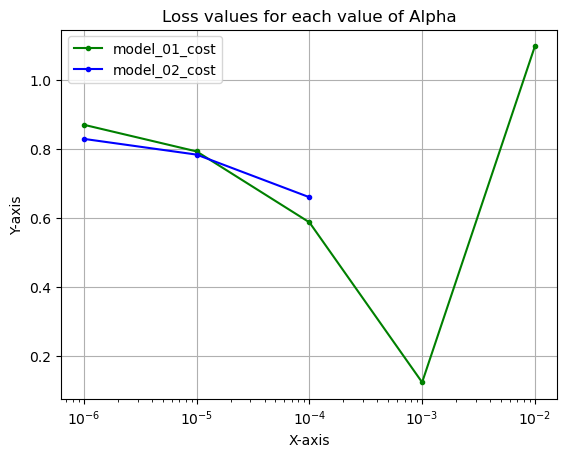

In [64]:
# Create a scatter plot with a red dashed line
plt.plot(alpha_list, model_01_cost, color='green', marker='.', label='model_01_cost')
plt.plot(alpha_list, model_02_cost, color='blue', marker='.', label='model_02_cost')
# Add labels and title
plt.xscale('log')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Loss values for each value of Alpha')
plt.grid(True)
plt.legend()
plt.show()

03.02 - Further training models

Based on the results of the quick grid search, the best paremeters of alpha are:

|      Model       | Best Alpha value |
| ---------------- | ---------------- |
| nn_class_model_01|        1e-3      |
| nn_class_model_02|      1e-4        |


Train the models for more iterations:

In [65]:
# Model 01
nn_class_model_01.train(features=X_train_norm, 
                            labels=Y_train, 
                            alpha= 1e-3, # learning rate used by the gradient descent.
                            n_iterations=10000,  # number of iterations done by the optimization algorithm.
                            e=1e-5,             # error difference to consider optimization convergency.
                            print_cost=True,print_each=1000)

1.0986122886681098
0.1252812690552099
0.09246539950202051
0.07855566995578367
0.06957508770260493
0.06410763124157969
0.0597391436309293
0.05666651053429119
0.054119573209049934
0.052189341168508735


In [66]:
# Model 02
nn_class_model_02.train(features=X_train_norm, 
                            labels=Y_train, 
                            alpha= 1e-4, # learning rate used by the gradient descent.
                            n_iterations=10000,  # number of iterations done by the optimization algorithm.
                            e=1e-5,             # error difference to consider optimization convergency.
                            print_cost=True,print_each=1000)

1.0986122886681098
0.6726268032209818
Optimization has converged!
Iteration: 
	1344
Cost: 
	0.6381813257723159


### 03- Test Models:

Testing the models on making inference on the testing data

In [67]:
# Model 01:
predicted_model_01 = nn_class_model_01.predict(X_test_norm)

In [68]:
# Model 02:
predicted_model_02 = nn_class_model_02.predict(X_test_norm)

Calculating Error

In [78]:
# Calculating the mean squared error:

def error(y_hat, y_test):
    return sum(np.argmax(y_hat, axis=1) - np.argmax(y_test, axis=1) == 0)/len(y_hat)

In [83]:
# Model 01:
print(f'This is the error of the model "predicted_model_01" in the testing dataset: \n\t{error(predicted_model_01, Y_test)}')


This is the error of the model "predicted_model_01" in the testing dataset: 
	0.9333333333333333


In [84]:
# Model 02:

print(f'This is the error of the model "predicted_model_02" in the testing dataset: \n\t{error(predicted_model_02, Y_test)}')


This is the error of the model "predicted_model_02" in the testing dataset: 
	0.6888888888888889


### 05- Conclusion

`Model 01` performs better at predicting/classify the Specie of the iris plants. 
<br>
Model 02 achieved an accuracy of 68% in the testing data, while Model 01 achieved an acccuracy of 93%.

### Author:
Emerson Goncalves